In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x1 = np.zeros((10,1))
y1 = np.zeros((10,1))
z1 = np.zeros((10,1))
for i in range(10):
    x1[i] = np.random.uniform(0.2,1)
    y1[i] = np.random.uniform(0.2,1)
    z1[i] = np.random.uniform(0.2,1)
x2 = np.zeros((10,1))
y2 = np.zeros((10,1))
z2 = np.zeros((10,1))
for i in range(10):
    x2[i] = np.random.uniform(0.2,1)
    y2[i] = np.random.uniform(-1,-0.2)
    z2[i] = np.random.uniform(-1,-0.2)
x3 = np.zeros((10,1))
y3 = np.zeros((10,1))
z3 = np.zeros((10,1))
for i in range(10):
    x3[i] = np.random.uniform(-1,-0.2)
    y3[i] = np.random.uniform(0.2,1)
    z3[i] = np.random.uniform(0.2,1)
x4 = np.zeros((10,1))
y4 = np.zeros((10,1))
z4 = np.zeros((10,1))
for i in range(10):
    x4[i] = np.random.uniform(-1,-0.2)
    y4[i] = np.random.uniform(-1,-0.2)
    y4[i] = np.random.uniform(-1,-0.2)

In [3]:
x = np.concatenate((x1, x2, x3, x4))
y = np.concatenate((y1, y2, y3, y4))
z = np.concatenate((z1, z2, z3, z4))

In [4]:
l = []
for i in range(40):
    if i<10:
        l.append(0)
    elif i>=10 and i<20:
        l.append(1)
    elif i>=20 and i<30:
        l.append(2)
    elif i>=30 and i<40:
        l.append(3)
l = np.array(l)
l = l.reshape((40,1))

In [5]:
res = np.concatenate((x, y, z, l), axis=1)

In [6]:
datatest = pd.DataFrame(res)
data = datatest

In [7]:
def centroid(data):
    var = data.columns
    m = len(var)
    l = []
    for i in range(m):
        l.append(var[i])
        l[i] = np.mean(data[var[i]])
    return l

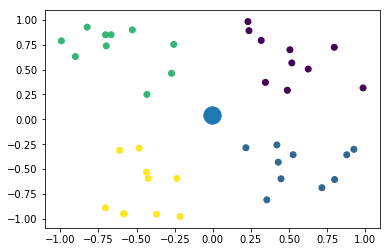

In [8]:
plt.scatter(data.iloc[:,0],data.iloc[:,1],c = data[data.columns[-1]])
plt.scatter(centroid(data)[0],centroid(data)[1],s=300)

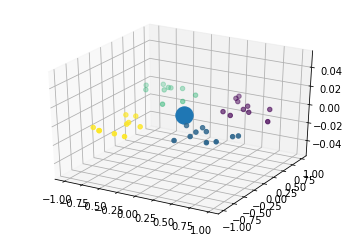

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:,0],data.iloc[:,1],c = data[data.columns[-1]])
ax.scatter(centroid(data)[0],centroid(data)[1],s=300)

In [10]:
centroid(datatest)

[-0.003934554382888677, 0.039376120674869224, 0.14271117385245488, 1.5]

In [11]:
def shuffledata(data):
    res = np.array(data)
    np.random.shuffle(res)
    new_res = np.concatenate((res, l), axis=1)
    data = pd.DataFrame(new_res)
    return data

In [12]:
data = shuffledata(data)

In [13]:
def graphcentre(data,nb_class,nbvar):
    v = locals()
    cen = []
    for i in range(nb_class):
        d = data.where(data.iloc[:,-1]==i)
        v['c%d' % i] = centroid(d.iloc[:,:nbvar])
        cen.append(v['c%d' % i])
    return cen

In [14]:
def dist(data,centre):
    dist=0
    for i in range(len(data)):
        dist = dist + (centre[i]-data[i])**2
    dist = np.sqrt(dist)
    return dist

In [15]:
def kmean(data,nbvar,nb_class):
    l = 0
    m = 1
    count = 0
    while l != m:
        if count > 0:
            l = [sum(centre[i]) for i in range(4)]
        centre = graphcentre(data,nb_class,nbvar)
        m = [sum(centre[i]) for i in range(4)]
        di = []
        v = locals()
        for j in range(nb_class):
            v['dist%d' % j] = np.zeros((len(data),1))
            for i in range(len(data)):
                v['dist%d' % j][i] = dist(data.iloc[i,:nbvar],centre[j])
            di.append(v['dist%d' % j])
    
        label = []    
        for i in range(len(data)):
            sel = []
            for j in range(nb_class):
                element = di[j]
                sel.append(element[i])
            label.append(sel.index(np.min(sel)))

        data['predict_label'] = label
        count += 1
    print(count)

In [16]:
kmean(data,3,4)

5


In [17]:
def graphinit(data):
    nbvar=3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[data.columns[0]],data[data.columns[1]],data[data.columns[2]],c = data[data.columns[-1]])
    ax.scatter(graphcentre(data,4,nbvar)[0][0],graphcentre(data,4,nbvar)[0][1],graphcentre(data,4,nbvar)[0][2],s=400)
    ax.scatter(graphcentre(data,4,nbvar)[1][0],graphcentre(data,4,nbvar)[1][1],graphcentre(data,4,nbvar)[1][2],s=400)
    ax.scatter(graphcentre(data,4,nbvar)[2][0],graphcentre(data,4,nbvar)[2][1],graphcentre(data,4,nbvar)[2][2],s=400)    
    ax.scatter(graphcentre(data,4,nbvar)[3][0],graphcentre(data,4,nbvar)[3][1],graphcentre(data,4,nbvar)[3][2],s=400)
    plt.show()

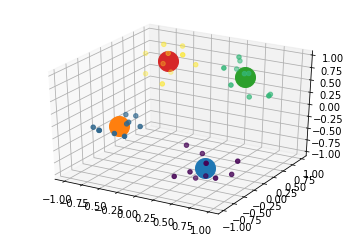

In [18]:
graphinit(data)

In [21]:
data.head()

,0,1,2,3,4,predict_label
0,-0.256043,0.753070,0.624119,2.0,0.0,3
1,0.344985,0.371952,0.876119,0.0,0.0,2
2,0.429095,-0.430836,-0.955171,1.0,0.0,0
3,0.518109,0.567370,0.721044,0.0,0.0,2
4,-0.703804,0.850275,0.704060,2.0,0.0,3
